In [1]:
import xarray as xr
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt, animation
import pandas as pd
import os
from cartopy import config
import cartopy.crs as ccrs
import cartopy.feature
import numpy as np
import dynamic_yaml
import warnings
warnings.filterwarnings('ignore')
from ww32seismo import *
with open("config.yml", 'r') as f:
    configs = dynamic_yaml.load(f)
video = True

In [2]:
import cmasher as cmr
cmap = cmr.cosmic    # CMasher
cmap = plt.get_cmap('cmr.cosmic')   # MPL

In [6]:
os.chdir("/home/raph/WORK/WAVEWATCH/WW3toSeismo")

In [3]:
work_dir = configs.params.work_dir
os.environ["CARTOPY_USER_BACKGROUNDS"] = os.path.join(work_dir,"/BG")

In [10]:
year = configs.download.year
month = configs.download.months[0]
ds  = xr.open_dataset(r"{}".format(os.path.join(work_dir,"DATA","P2L","{}".format(year),"FIELD_NC","LOPS_WW3-GLOB-30M_{}{:02d}.nc".format(year,month))))
var_key="hs"

In [11]:
def animate(i):
    m.set_array(ds.isel(time=i)[var_key])
    ax.title.set_text(pd.to_datetime(ds.isel(time=i).time.time.values).strftime("%d/%m/%Y, %H:%M:%S"))

# World map of significant wave heights

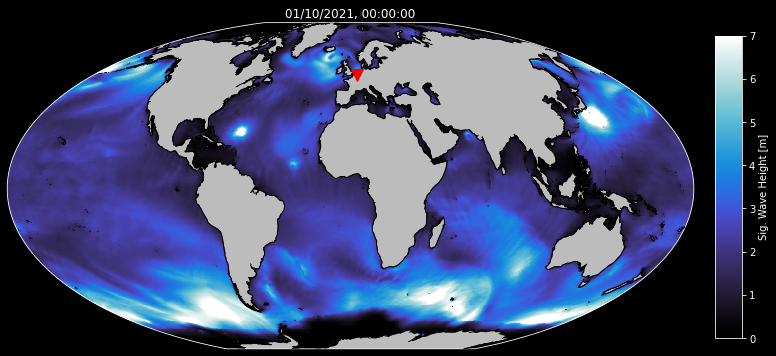

In [12]:
plt.style.use('dark_background')
xmin = -180
xmax = 180
ymin = -90
ymax = 90
vmax = 7


cmap = plt.get_cmap('cmr.freeze')

target_lat = configs.params.station_lat
target_lon = configs.params.station_lon

fig = plt.figure(figsize=(15, 6))
ax = plt.axes(projection=ccrs.Mollweide())
ax.coastlines(resolution='50m', linewidth=0.5, zorder=9, color="k")

ax.add_feature(cartopy.feature.LAND, edgecolor='k', facecolor="#bcbcbc", zorder = 2)

m = ax.pcolormesh(ds["longitude"], ds["latitude"],  ds.isel(time=0)[var_key], 
                  shading='nearest', vmin=0, vmax=vmax, cmap=cmap, transform=ccrs.PlateCarree())
cbar_ax = fig.add_axes([0.85, 0.15, 0.025, 0.7])
cb = fig.colorbar(m, cax=cbar_ax)    
cb.set_label("Sig. Wave Height [m]")

ax.plot(target_lon, target_lat, "rv",markersize=12, zorder =10, transform=ccrs.PlateCarree())

title = pd.to_datetime(ds.isel(time=0).time.time.values).strftime("%d/%m/%Y, %H:%M:%S")
ax.set_title(title, color="w")
plt.tight_layout()
#plt.plot()

In [13]:
anim = animation.FuncAnimation(fig, animate, interval=100, frames=len(ds.time) - 1)
anim.save('{}/MAPS/world_waves.gif'.format(work_dir))
plt.show()

# European map of significant wave heights

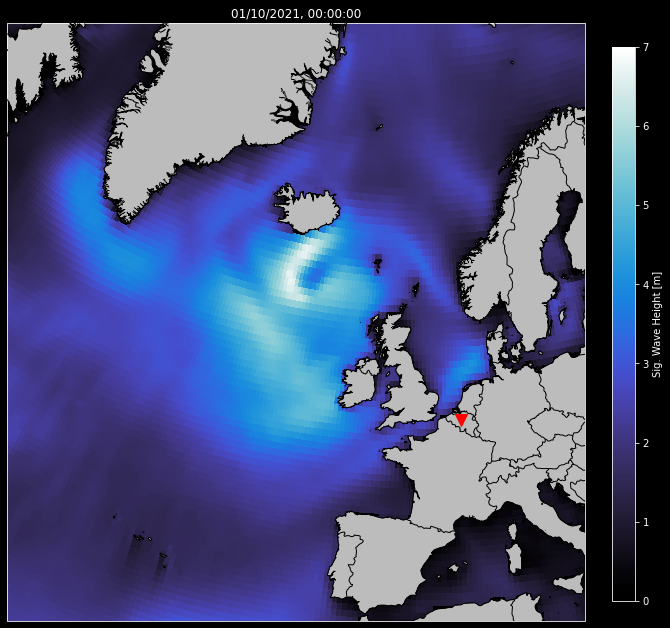

In [51]:
plt.style.use('dark_background')
#cmap = "magma"
#cmap = plt.get_cmap('cmr.cosmic')

fig2 = plt.figure(figsize=(13,11))

ax = plt.axes(projection=ccrs.LambertConformal(central_longitude=0.0, central_latitude=50.0))
ax.coastlines("10m", linewidth=0.5, zorder=9, color="k")

m = ax.pcolormesh(ds["longitude"], ds["latitude"],  ds.isel(time=0)[var_key], 
                  shading='nearest', vmin=0, vmax=vmax, cmap=cmap, transform=ccrs.PlateCarree())
cbar_ax = fig2.add_axes([0.85, 0.15, 0.025, 0.7])
cb = fig2.colorbar(m, cax=cbar_ax)    
cb.set_label("Sig. Wave Height [m]")


target_lat = configs.params.station_lat
target_lon = configs.params.station_lon
ax.add_feature(cartopy.feature.LAND, edgecolor='k', facecolor="#bcbcbc", zorder = 2)
ax.add_feature(cartopy.feature.BORDERS, edgecolor='k', facecolor="#bcbcbc", zorder = 2)
ax.plot(target_lon, target_lat, "rv",markersize=12, zorder =10, transform=ccrs.PlateCarree())
ax.set_extent([-40, 15, 35, 75], crs=ccrs.PlateCarree())

title = pd.to_datetime(ds.isel(time=0).time.time.values).strftime("%d/%m/%Y, %H:%M:%S")
ax.set_title(title, color="w")
plt.tight_layout()

In [36]:
anim = animation.FuncAnimation(fig2, animate, interval=100, frames=len(ds.time) - 1)
anim.save('{}/MAPS/euro_waves.gif'.format(work_dir))
plt.show()